In [2]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
#Read csv
csv_path = '../Clean_data/car_data.csv'
car_data_df = pd.read_csv(csv_path)
car_data_df

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [4]:
mpg_year_group = car_data_df.groupby(['Body Style','Year']).mean()['Highway MPG']

In [5]:
mpg_year_group_df = pd.DataFrame(mpg_year_group).reset_index()
mpg_year_group_df

,Body Style,Year,Highway MPG
0,Car,1996,24.144444
1,Car,1997,26.321429
2,Car,1998,26.459239
3,Car,1999,26.461538
4,Car,2000,26.596659
...,...,...,...
64,Van,2014,23.192308
65,Van,2015,24.209677
66,Van,2016,24.033333
67,Van,2018,26.491803


In [6]:
body_styles = mpg_year_group_df['Body Style'].unique()
mpg_year_group_df

,Body Style,Year,Highway MPG
0,Car,1996,24.144444
1,Car,1997,26.321429
2,Car,1998,26.459239
3,Car,1999,26.461538
4,Car,2000,26.596659
...,...,...,...
64,Van,2014,23.192308
65,Van,2015,24.209677
66,Van,2016,24.033333
67,Van,2018,26.491803


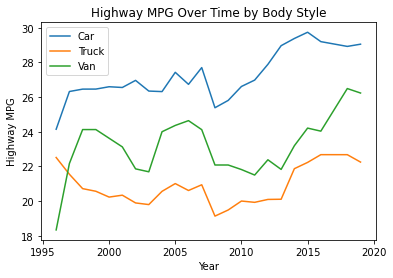

In [14]:
for style in body_styles:
    filter_df = mpg_year_group_df.loc[mpg_year_group_df["Body Style"] == style]
    plt.plot(filter_df['Year'],filter_df['Highway MPG'], label = style)
plt.legend()
plt.title('Highway MPG Over Time by Body Style')
plt.xlabel('Year')
plt.ylabel('Highway MPG')
plt.savefig("../output_images/MpgOverTime.png",dpi=200)
plt.show()

## Key Takeaways:
* Smaller cars on average have better highway mpg
* MPG efficiency has improved drastically over the past 25 years

In [8]:
mpg_year_group = car_data_df.groupby(['Body Style','Year']).mean()[['Retail Price','Highway MPG']].reset_index()
mpg_year_group

,Body Style,Year,Retail Price,Highway MPG
0,Car,1996,27925.186544,24.144444
1,Car,1997,28097.921833,26.321429
2,Car,1998,27755.932615,26.459239
3,Car,1999,27577.415233,26.461538
4,Car,2000,28482.681395,26.596659
...,...,...,...,...
64,Van,2014,32097.559524,23.192308
65,Van,2015,33122.941176,24.209677
66,Van,2016,33639.392523,24.033333
67,Van,2018,35936.954023,26.491803


The correlation of Car price to highway mpg is 0.61
The correlation of Truck price to highway mpg is 0.1
The correlation of Van price to highway mpg is 0.15


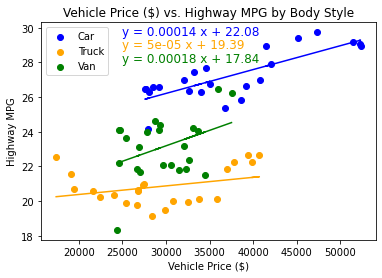

In [13]:
colors = ['blue', 'orange', 'green']
location1 = 29.6
location2 = 25000

for x in range(len(colors)):
    filter_df = mpg_year_group.loc[mpg_year_group["Body Style"] == body_styles[x]]
    plt.scatter(filter_df['Retail Price'],filter_df['Highway MPG'],color = colors[x], label = body_styles[x])
    (slope, intercept, rvalue, pvalue, stderr) = linregress(filter_df['Retail Price'],filter_df['Highway MPG'])
    regress_values = slope * filter_df['Retail Price'] + intercept
    line_equation = f"y = {str(round(slope, 5))} x + {str(round(intercept,2))}"
    plt.plot(filter_df['Retail Price'],regress_values, color = colors[x])
    plt.annotate(line_equation,(location2,location1), fontsize = 12, color = colors[x])
    location1 = location1 - .8
    print (f'The correlation of {body_styles[x]} price to highway mpg is {str(round(rvalue**2,2))}')
plt.title('Vehicle Price ($) vs. Highway MPG by Body Style')
plt.xlabel('Vehicle Price ($)')
plt.ylabel('Highway MPG')
plt.legend()
plt.savefig("../output_images/PriceVsMpg.png",dpi=200)
plt.show()

## Key Takeaways:
* Vehicle price and their corresponding highway mpg are positively correlated for all body styles
* The only relatively strong correlation is within Cars